In [1]:
# Input info
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/cluster_clone_counts_donors/"
se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
input_col = "Input"


In [2]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
%matplotlib inline

In [4]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
if "cluster_labels" in se_cells_meta.columns:
    se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
else:
    se_cells_meta = se_cells_meta.rename({"seurat_clusters":"nuclear_clusters"}, axis=1)
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
Control_AAACGAAAGAATCAGT-1,Control,1972,1972,6432,1259,31,19,266,1066,3791,...,6,2211,1942,AAACGAAAGAATCAGT-1_Control,Control_AAACGAAAGAATCAGT-1,4,1,Control,1_4,eosonophil
Control_AAACGAAAGCATACCT-1,Control,2674,2674,11858,1937,51,34,549,3102,6185,...,7,3311,2750,AAACGAAAGCATACCT-1_Control,Control_AAACGAAAGCATACCT-1,30,1,Control,1_30,MPP/CMP/GMP C
Control_AAACGAAAGCGAGAAA-1,Control,1939,1939,7365,1097,25,27,275,2184,3757,...,7,2112,1838,AAACGAAAGCGAGAAA-1_Control,Control_AAACGAAAGCGAGAAA-1,15,0,Control,0_15,MPP/CMP/GMP C
Control_AAACGAAAGTACAGAT-1,Control,862,862,4095,861,16,16,230,771,2201,...,4,1441,1317,AAACGAAAGTACAGAT-1_Control,Control_AAACGAAAGTACAGAT-1,9,0,Control,0_9,erythroid
Control_AAACGAAAGTACAGTA-1,Control,1775,1775,8088,1091,27,27,369,2157,4417,...,6,2385,2085,AAACGAAAGTACAGTA-1_Control,Control_AAACGAAAGTACAGTA-1,17,1,Control,1_17,eosonophil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTGTTTCTTAC-1,Input,3585,3585,17067,3257,63,80,461,8097,5109,...,3,3738,2899,TTTGTGTGTTTCTTAC-1_Input,Input_TTTGTGTGTTTCTTAC-1,6,0,Input,0_6,MPP/CMP/GMP B
Input_TTTGTGTTCCTGAAAC-1,Input,4362,4362,30427,8323,84,99,799,12146,8976,...,11,5839,4144,TTTGTGTTCCTGAAAC-1_Input,Input_TTTGTGTTCCTGAAAC-1,11,0,Input,0_11,MEP
Input_TTTGTGTTCGGGAAAC-1,Input,8047,8047,40114,14032,169,160,1561,10102,14090,...,3,9421,5890,TTTGTGTTCGGGAAAC-1_Input,Input_TTTGTGTTCGGGAAAC-1,37,0,Input,0_37,MPP/CMP/GMP B
Input_TTTGTGTTCGGGACAA-1,Input,3303,3303,22721,4421,43,84,546,11692,5935,...,4,4303,3323,TTTGTGTTCGGGACAA-1_Input,Input_TTTGTGTTCGGGACAA-1,3,1,Input,1_3,erythroid


### Remove None before normalizing

In [5]:
se_cells_meta = se_cells_meta[se_cells_meta["orig.ident"] == input_col]
se_cells_meta = se_cells_meta[se_cells_meta["donor"] != "None"]
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
Input_AAACGAAAGATATGAC-1,Input,2858,2858,29954,4853,67,103,626,19521,4784,...,2,3172,2505,AAACGAAAGATATGAC-1_Input,Input_AAACGAAAGATATGAC-1,17,1,Input,1_17,MPP/CMP/GMP
Input_AAACGAAAGTAATGTG-1,Input,6511,6511,32111,9018,96,122,1319,11232,10324,...,2,7161,4861,AAACGAAAGTAATGTG-1_Input,Input_AAACGAAAGTAATGTG-1,12,1,Input,1_12,MPP/CMP/GMP
Input_AAACGAAAGTAGTCGG-1,Input,7561,7561,37923,12542,147,162,1705,10189,13178,...,3,8960,5447,AAACGAAAGTAGTCGG-1_Input,Input_AAACGAAAGTAGTCGG-1,29,1,Input,1_29,MPP/CMP/GMP B
Input_AAACGAACACATTGCA-1,Input,6920,6920,46206,12553,148,184,1239,16880,15202,...,13,10041,5539,AAACGAACACATTGCA-1_Input,Input_AAACGAACACATTGCA-1,0,1,Input,1_0,CLP
Input_AAACGAACACGCTCAG-1,Input,5875,5875,38973,7584,162,150,973,19691,10413,...,2,7103,4786,AAACGAACACGCTCAG-1_Input,Input_AAACGAACACGCTCAG-1,0,0,Input,0_0,MPP/CMP/GMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTGTTTCTTAC-1,Input,3585,3585,17067,3257,63,80,461,8097,5109,...,3,3738,2899,TTTGTGTGTTTCTTAC-1_Input,Input_TTTGTGTGTTTCTTAC-1,6,0,Input,0_6,MPP/CMP/GMP B
Input_TTTGTGTTCCTGAAAC-1,Input,4362,4362,30427,8323,84,99,799,12146,8976,...,11,5839,4144,TTTGTGTTCCTGAAAC-1_Input,Input_TTTGTGTTCCTGAAAC-1,11,0,Input,0_11,MEP
Input_TTTGTGTTCGGGAAAC-1,Input,8047,8047,40114,14032,169,160,1561,10102,14090,...,3,9421,5890,TTTGTGTTCGGGAAAC-1_Input,Input_TTTGTGTTCGGGAAAC-1,37,0,Input,0_37,MPP/CMP/GMP B
Input_TTTGTGTTCGGGACAA-1,Input,3303,3303,22721,4421,43,84,546,11692,5935,...,4,4303,3323,TTTGTGTTCGGGACAA-1_Input,Input_TTTGTGTTCGGGACAA-1,3,1,Input,1_3,erythroid


In [6]:
group_counts = se_cells_meta.groupby(["nuclear_clusters", "donor"]).size()

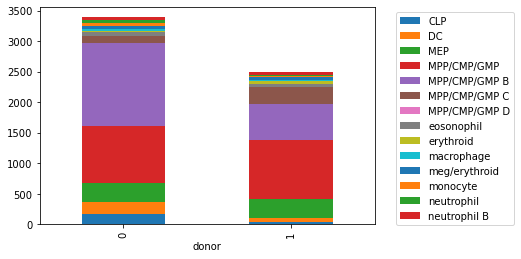

In [7]:
group_counts.reset_index().pivot(columns="nuclear_clusters", index="donor", values=0).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "all_clones_barplot_clones.png"))

### Normalize to each donor

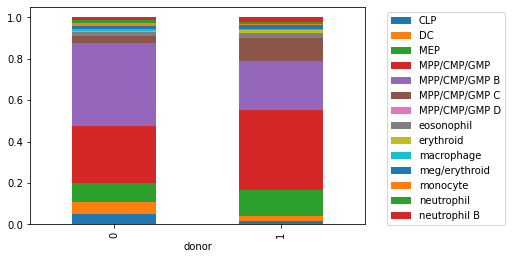

In [8]:
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters", index="donor", values=0)#.plot.bar(stacked=True)
tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose().plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "norm_all_clones_barplot_clones.png"))

In [9]:
def donor_plots(df, name):
    donors = df["donor"].unique()
    f, ax = plt.subplots(figsize=(12,12), ncols=len(donors))
    count = 0
    for d, val in df.groupby("donor"):
        val.drop(["ncells", "donor"],axis=1).plot.bar(stacked=True, ax=ax[count])
        ax[count].set_title(f"Donor {d}")
        count += 1
        
    plt.savefig(join(outdir, name+"barplot_clones.png"))
    return

In [10]:
clone_counts = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_counts_df

clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=10]


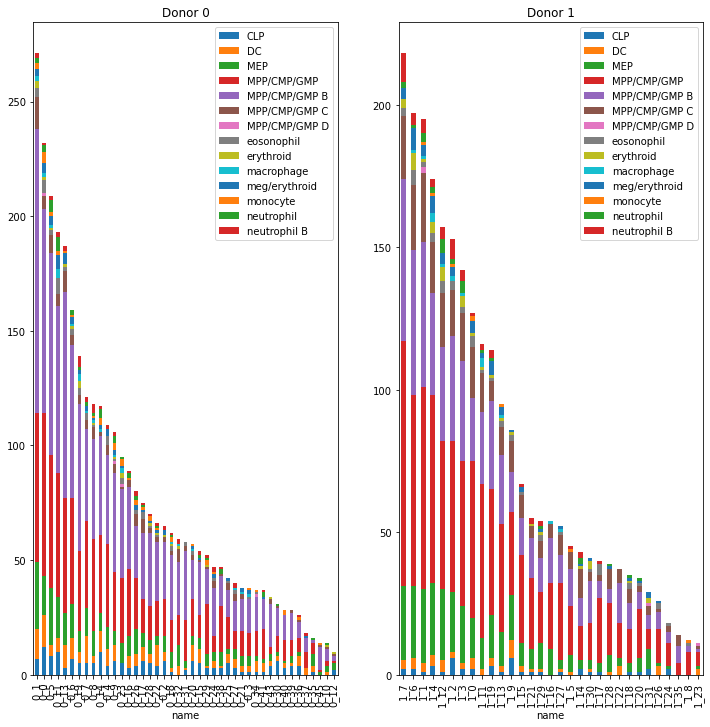

In [11]:
%matplotlib inline
donor_plots(clone_counts_filt_10_df,
      name="clone_cluster_counts")

# Normalize per clone

In [12]:
clone_sums = clone_counts.groupby("name").sum()["ncells"]
clone_sums

name
0_0     232
0_1     271
0_10     14
0_11    193
0_12     10
       ... 
1_5      45
1_6     197
1_7     218
1_8      12
1_9      86
Name: ncells, Length: 79, dtype: int64

In [13]:
clone_norm = clone_counts.copy()
clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/clone_sums.loc[(x["name"])] , axis=1)

print("sum of normed values", clone_norm.groupby(["nuclear_clusters", "donor"]).sum()["ncells"])

#clone_norm = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_norm[clone_norm["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_norm_df.head()


sum of normed values nuclear_clusters  donor
CLP               0         2.678927
                  1         0.628542
DC                0         2.956732
                  1         1.327266
MEP               0         4.229469
                  1         3.603612
MPP/CMP/GMP       0        11.300609
                  1        14.658638
MPP/CMP/GMP B     0        17.492092
                  1         7.989613
MPP/CMP/GMP C     0         1.620659
                  1         3.761961
MPP/CMP/GMP D     0         0.051298
                  1         0.135648
eosonophil        0         0.593280
                  1         0.883624
erythroid         0         0.390317
                  1         0.410436
macrophage        0         0.253409
                  1         0.128067
meg/erythroid     0         0.626358
                  1         0.601140
monocyte          0         0.595681
                  1         0.149241
neutrophil        0         0.585744
                  1         0.

,donor,ncells,CLP,DC,MEP,MPP/CMP/GMP,MPP/CMP/GMP B,MPP/CMP/GMP C,MPP/CMP/GMP D,eosonophil,erythroid,macrophage,meg/erythroid,monocyte,neutrophil,neutrophil B
name,,,,,,,,,,,,,,,,
0_0,0,1.0,0.051724,0.060345,0.073276,0.306034,0.383621,0.025862,0.00431,0.025862,0.004310,0.008621,0.017241,0.021552,0.012931,0.004310
1_13,1,1.0,0.010526,0.021053,0.126316,0.400000,0.252632,0.105263,0.00000,0.021053,0.010526,0.010526,0.031579,0.010526,0.000000,0.000000
1_20,1,1.0,0.029412,0.000000,0.147059,0.500000,0.176471,0.058824,0.00000,0.029412,0.000000,0.000000,0.029412,0.000000,0.029412,0.000000
1_2,1,1.0,0.039216,0.013072,0.137255,0.346405,0.241830,0.104575,0.00000,0.019608,0.000000,0.013072,0.019608,0.006536,0.013072,0.045752
1_19,1,1.0,0.026316,0.026316,0.131579,0.385965,0.271930,0.061404,0.00000,0.008772,0.008772,0.000000,0.043860,0.000000,0.008772,0.026316


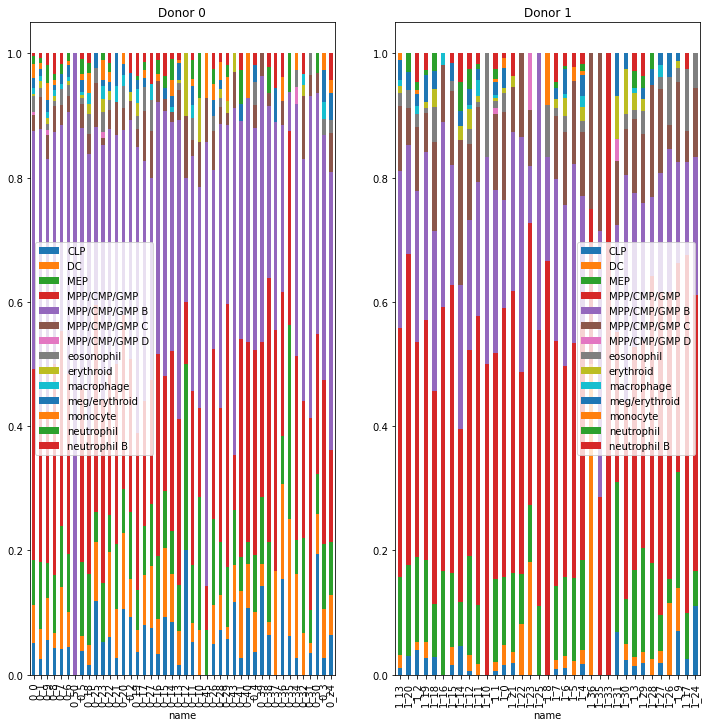

In [14]:
donor_plots(clone_norm_df,
      name="normalized_counts")

## Only top clones

In [15]:
cell_25 = keep_top_clones(clone_counts_filt_10_df, min_cell=25).index

In [16]:
# from sklearn.datasets import make_blobs
# import colorcet as cc
# import matplotlib.pyplot as plt
# import seaborn as sns

#https://stackoverflow.com/questions/68209351/how-to-make-a-color-map-with-many-unique-colors-in-seaborn
#palette = sns.color_palette(cc.glasbey, n_colors=25)


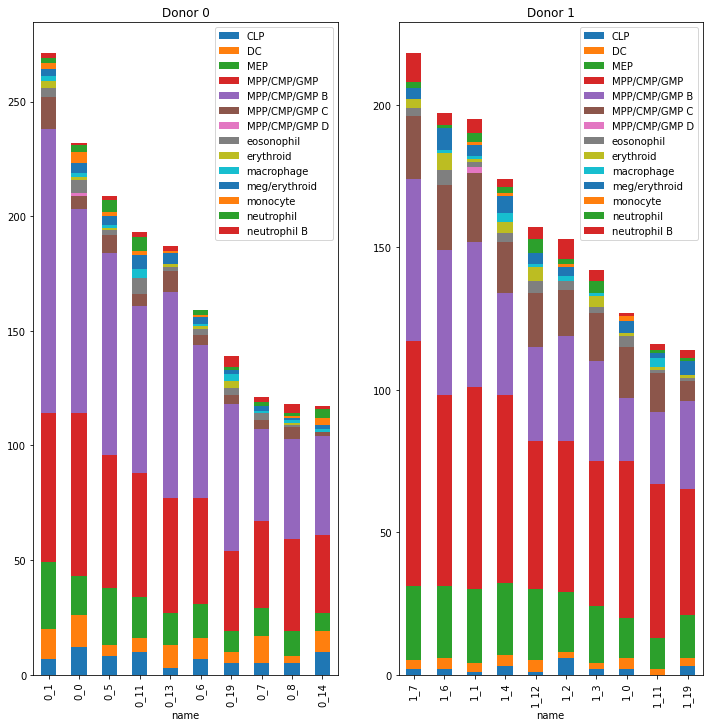

In [17]:
donor_plots(keep_top_clones(clone_counts_filt_10_df, n_top=20, min_cell=25),
      name="top20_minCell25_clone_counts")

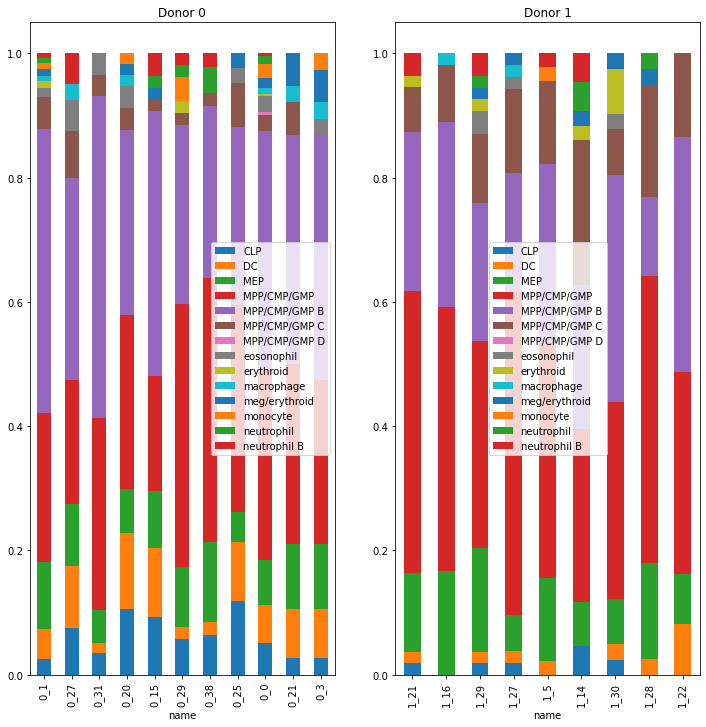

In [18]:
donor_plots(keep_top_clones(clone_norm_df.loc[cell_25], n_top=20, min_cell=0),
     name="top20_minCell25_clone_normalized_counts")

## Distribution of counts by cluster

---

---

---

---

In [19]:
outdir

'/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/cluster_clone_counts_donors/'